In [1]:
%load_ext autoreload
%autoreload 2


from PKEvolution import PKEvolution

Note: redshifts have been re-sorted (earliest first)


/Users/ivandebono/Repositories/CosmoLSS/PKEvolution.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


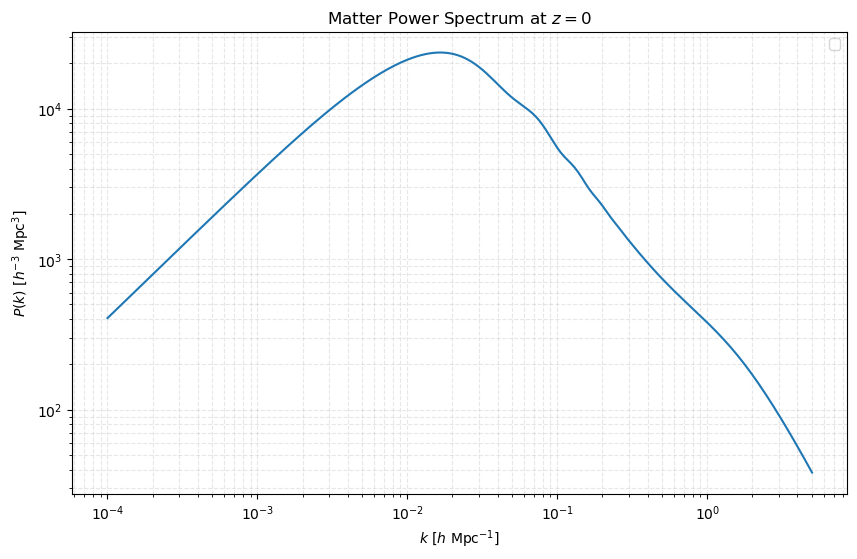

In [2]:
pke=PKEvolution()

pke.mk_pkz()

fig1=pke.plt_pk(z=0)


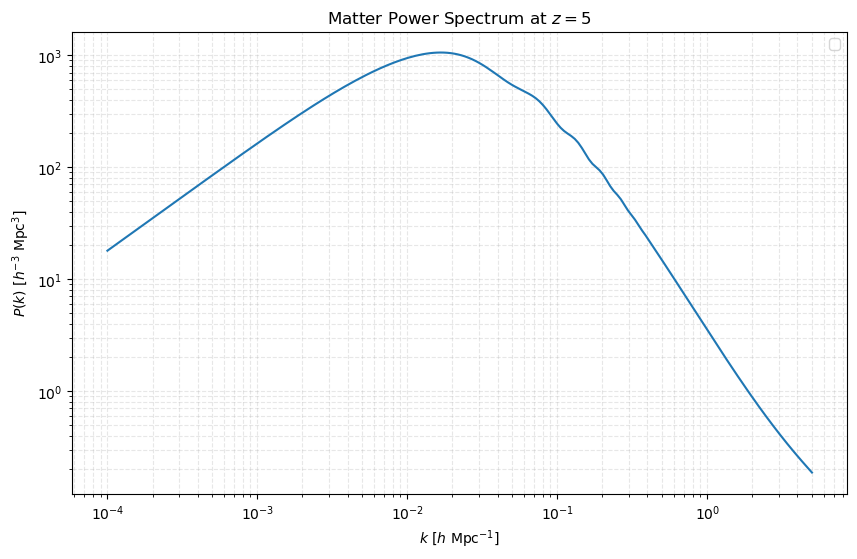

In [3]:

fig2=pke.plt_pk(z=5)


In [4]:
# Set display=True to display the animation in the notebook
# Set filename=[your_own_filename.mp4] to save it as a video file.
pke.pk_animation(dpi=200,display=False,filename='pk_evolution.mp4')

Animation saved to pk_evolution.mp4


# Computing the Density Contrast from the Matter Power Spectrum

In cosmology, the **density contrast** $\delta(\mathbf{x})$ describes fluctuations in matter density relative to the cosmic mean. It can be computed from the **matter power spectrum** $P(k)$ using Fourier methods. Below is a step-by-step guide.

---

## Key Definitions

### Density Contrast
$$
\delta(\mathbf{x}) = \frac{\rho(\mathbf{x}) - \bar{\rho}}{\bar{\rho}},
$$
where:
- $\rho(\mathbf{x})$ = matter density at position $\mathbf{x}$,
- $\bar{\rho}$ = mean matter density of the universe.

### Matter Power Spectrum $P(k)$
The power spectrum quantifies the variance of density fluctuations in Fourier space:
$$
\langle \delta(\mathbf{k}) \delta^*(\mathbf{k'}) \rangle = (2\pi)^3 \delta_D(\mathbf{k} - \mathbf{k'}) P(k),
$$
where:
- $\delta(\mathbf{k})$ = Fourier transform of $\delta(\mathbf{x})$,
- $\delta_D$ = Dirac delta function.

---

## Step-by-Step Calculation

### 1. Generate a Gaussian Random Field
Initial density fluctuations are Gaussian, so $\delta(\mathbf{x})$ is a Gaussian random field.

### 2. Sample Fourier Modes $\delta(\mathbf{k})$
For each wavenumber $\mathbf{k}$:
- Draw a complex Gaussian random variable with variance $P(k)$:
  $$
  \delta(\mathbf{k}) = \sqrt{\frac{P(k)}{2}} (g_1 + i g_2),
  $$
  where $g_1, g_2$ are independent standard normal variables.

### 3. Impose Hermitian Symmetry
To ensure $\delta(\mathbf{x})$ is real-valued:
$$
\delta(-\mathbf{k}) = \delta^*(\mathbf{k}).
$$

### 4. Inverse Fourier Transform
Convert $\delta(\mathbf{k})$ to real space:
$$
\delta(\mathbf{x}) = \int \frac{d^3k}{(2\pi)^3} \delta(\mathbf{k}) e^{i \mathbf{k} \cdot \mathbf{x}}.
$$

### 5. Normalization Check
Verify that the generated field satisfies:
$$
\langle |\delta(\mathbf{k})|^2 \rangle = P(k).
$$



In [5]:
# Generate density field
N, L = 128, 100.0  # Grid size and box size in Mpc/h
delta_x=pke.generate_density_field(N,L)

In [6]:
print(delta_x)

[[[ 8.03786598e-03  5.20539073e-03  4.08726645e-03 ... -4.11611385e-04
   -3.33679741e-04  5.23003200e-03]
  [-1.24786665e-03 -9.17379587e-04 -7.39257016e-03 ...  4.55291864e-03
   -8.64172541e-03 -8.56729184e-03]
  [-2.62572835e-03 -8.53286922e-03 -1.37231441e-02 ... -1.71893307e-03
    1.50258527e-02  2.75526079e-03]
  ...
  [ 4.44147315e-03  3.12900689e-03  4.43897942e-03 ... -3.23602913e-03
   -7.35983654e-04 -4.40551170e-03]
  [-3.92778435e-03 -1.02478352e-03  5.18284364e-03 ... -4.00321911e-03
   -8.72747283e-03  1.90810257e-03]
  [-1.02567921e-02  4.54008046e-03  6.47035686e-03 ...  7.63570807e-04
    2.39146026e-04 -7.54647070e-03]]

 [[-8.82931367e-03 -6.52910246e-03 -3.02162168e-03 ...  4.03932617e-03
    2.05150494e-03 -3.39258076e-03]
  [-6.41108891e-03  4.50649053e-03 -3.26454399e-03 ... -2.43081195e-03
   -5.36661848e-03 -1.20889570e-02]
  [-7.70716722e-03 -8.84551308e-03 -1.78958470e-03 ...  6.47024379e-03
    8.69505433e-03  7.74502127e-03]
  ...
  [ 3.05568212e-03  9.2

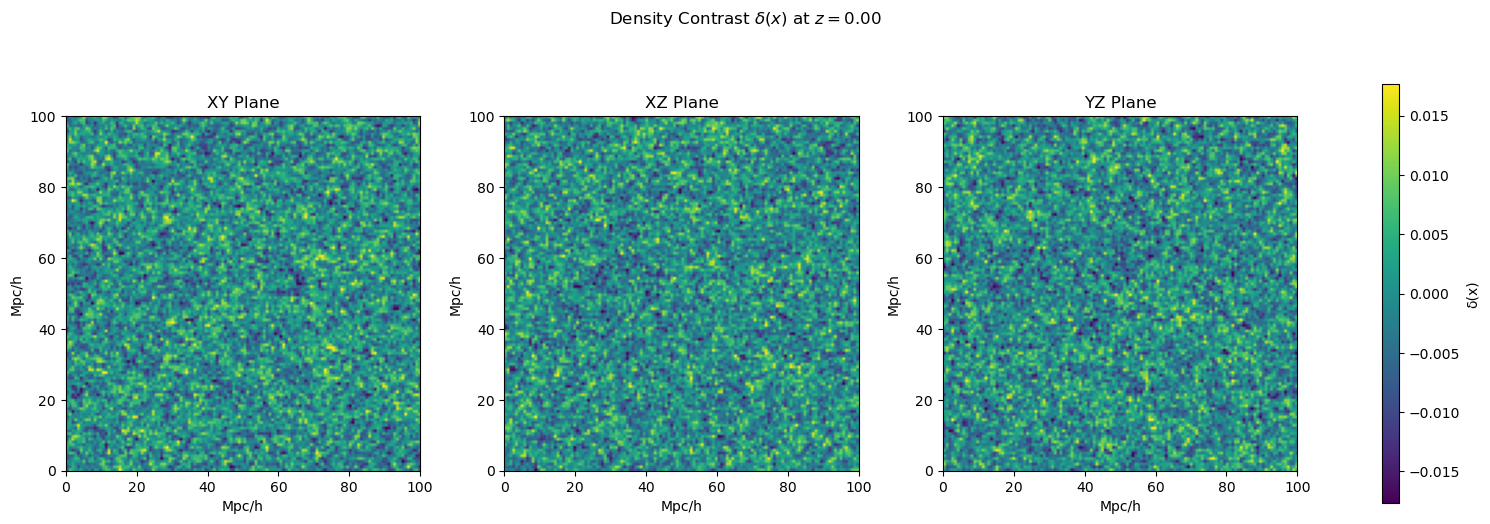

In [7]:
pke.plot_density_field(z=0,L=100.0,N=128)

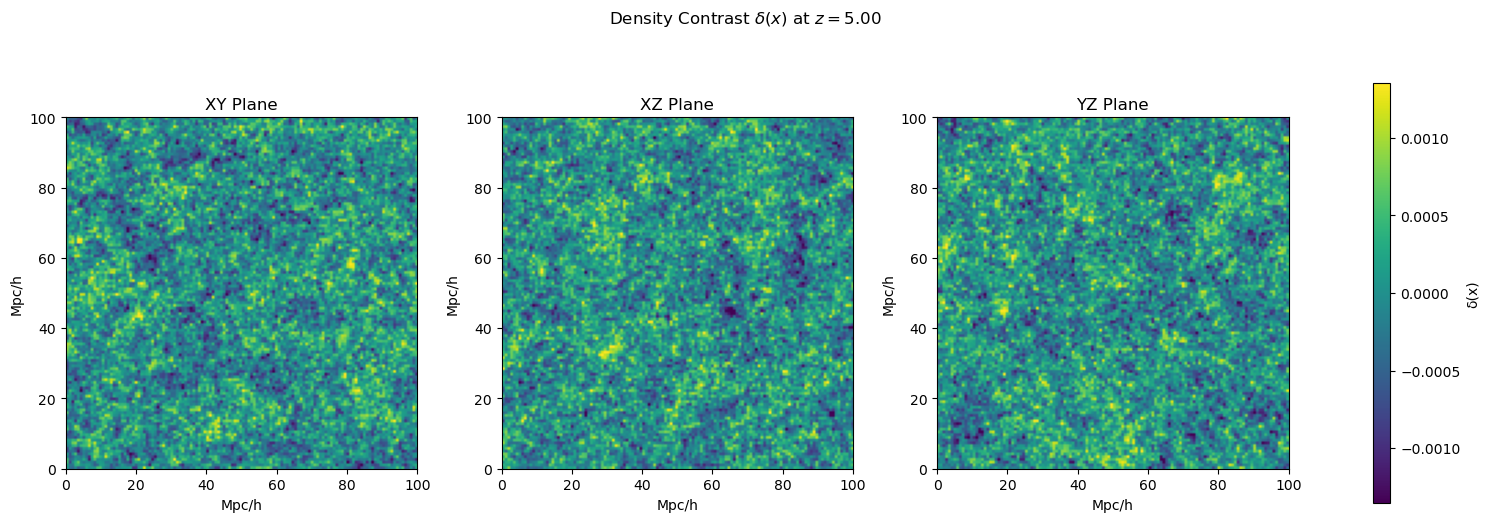

In [8]:
pke.plot_density_field(z=5,L=100.0,N=128)

In [9]:
delta_x_list=pke.mk_delta_x_z()

In [11]:
# Set display=True to display the animation in the notebook
# Set filename=[your_own_filename.mp4] to save it as a video file.
pke.create_density_evolution_animation(delta_x_list,pke.z,L=100.,fps=5,display=False,filename='density_evolution.mp4')

/Users/ivandebono/Repositories/CosmoLSS/PKEvolution.py:308: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


Animation saved to density_evolution.mp4
